In [ ]:
import pandas as pd
import os
import requests
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display

import warnings
warnings.filterwarnings("ignore")







# datadict(df)






def pd_DF_one_shot_info(df,log_bool=True):
    oneshot=pd.concat(
        [df.head(3).rename(index={0:' head_1', 1:'head_2',2:'head_3'}),
        pd.DataFrame(df.dtypes,columns=['dtypes']).T,
        df.describe(include='all')],axis=0)
    uniquevales=df.nunique().sort_values()
    plot_u=uniquevales.plot.bar(logy=log_bool,figsize=(15,5),title='Unique values per column',rot=90,grid=True)

    # pie=df.plot.pie(y=df.isna(),figsize=(15,10),title='Unique values per column')
    x=datadict(df)

# Plot information with y-axis in log-scale
        
    display(oneshot,df.shape,plot_u,x) 
           
    return x

def datadict(df):
    x=(pd.concat([df.dtypes,df.nunique(),df.count(),df.isnull().sum(),df[df.isnull()==0].kurtosis()],axis=1))
    type(x)
    x=x.reset_index()
    collist=x.columns.to_list()
    columns=['name','data type','unique','total count','null count','non null kurt']
    coldict=dict(zip(collist,columns))
    x.rename(columns=coldict,inplace=True)
    x.sort_values(by=['unique','total count','name'],inplace=True)
    x=x.reset_index(drop=True)
    x['percent null']=(x['null count']/ x['total count'])*100
    
    print(x.to_markdown())
    return x





    # approach #2 with sales:
# make a for loop, only change the number based on
# what we get in the max page:
def  new_sales_data():
    base_url = 'https://python.zgulde.net/api/v1/sales?page='
    sales = []
    for page_no in range(1,184):
        endpoint = str(page_no)
        response = requests.get(
            base_url+endpoint).json()['payload']['sales']
        print(f'Getting page {endpoint} of 183', end='')
        sales.extend(response)
    sales_df = pd.DataFrame(sales)
    return sales_df

    


In [ ]:
def get_sales_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    dbname='sales'
    if os.path.isfile('sales.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('sales.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_sales_data()
        
        # Cache data
        df.to_csv('sales.csv')
    print(f'This is for\n {dbname}\n\n')
    pd_DF_one_shot_info(df)    
    return df


def new_items_data():
    base_url = 'https://python.zgulde.net'
    endpoint = '/api/v1/items'
    # initialize an empty list
    items = []

    # make a while loop that does the thing 
    # until its no longer true:

    while True:
        url = base_url + endpoint
        response = requests.get(url)
        data = response.json()
        # print(f'Getting page {data['payload']['page']} of {data['payload']['max_page']}: {url}', 
        #       end='')
        items.extend(data['payload']['items'])
        endpoint = data['payload']['next_page']
        if endpoint is None:
            break
    items_df = pd.DataFrame(items)
    return items_df


def get_items_data():
    '''
    This function reads in telco data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    dbname='items'
    if os.path.isfile('items.csv'):
        
        # If csv file exists read in data from csv file.
        df = pd.read_csv('items.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame
        df = new_items_data()
        
        # Cache data
        df.to_csv('items.csv')
    print(f'This is for\n {dbname}\n\n')
    pd_DF_one_shot_info(df)    
    return df
    


This is for
 sales


|    | name        | data type   |   unique |   total count |   null count |   non null kurt |   percent null |
|---:|:------------|:------------|---------:|--------------:|-------------:|----------------:|---------------:|
|  0 | store       | int64       |       10 |        913000 |            0 |        -1.22424 |              0 |
|  1 | item        | int64       |       50 |        913000 |            0 |        -1.20096 |              0 |
|  2 | sale_amount | float64     |      213 |        913000 |            0 |         0.50907 |              0 |
|  3 | sale_date   | object      |     1826 |        913000 |            0 |       nan       |              0 |
|  4 | sale_id     | int64       |   913000 |        913000 |            0 |        -1.2     |              0 |


,item,sale_amount,sale_date,sale_id,store
head_1,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1
head_2,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1
head_3,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1
dtypes,int64,float64,object,int64,int64
count,913000.0,913000.0,913000,913000.0,913000.0
unique,NaN,NaN,1826,NaN,NaN
top,NaN,NaN,"Tue, 01 Jan 2013 00:00:00 GMT",NaN,NaN
freq,NaN,NaN,500,NaN,NaN
mean,25.5,52.250287,NaN,456500.5,5.5
std,14.430878,28.801144,NaN,263560.542224,2.872283


(913000, 5)

<AxesSubplot:title={'center':'Unique values per column'}>

,name,data type,unique,total count,null count,non null kurt,percent null
0,store,int64,10,913000,0,-1.224243,0.0
1,item,int64,50,913000,0,-1.200960,0.0
2,sale_amount,float64,213,913000,0,0.509070,0.0
3,sale_date,object,1826,913000,0,NaN,0.0
4,sale_id,int64,913000,913000,0,-1.200000,0.0


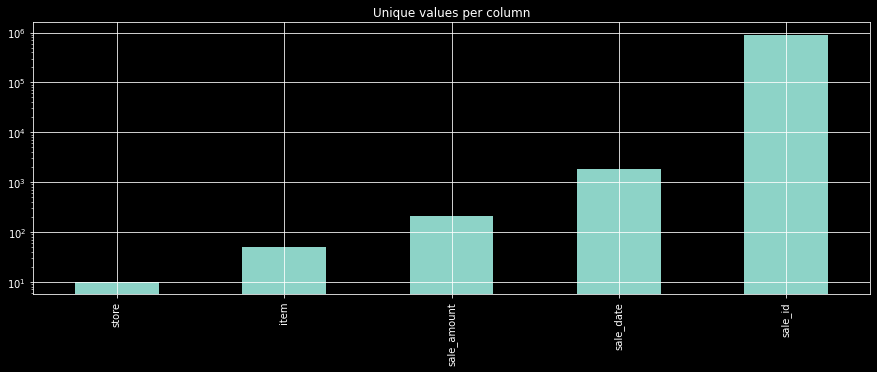

In [ ]:
sales=get_sales_data()




### Exercises

The end result of this exercise should be a file named prepare.py.

Using your store items data:



1. Convert date column to datetime format. 
2. Plot the distribution of sale_amount and item_price. 
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is derived from sale_amount(total items) and item_price. 
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:



1. Convert date column to datetime format. 
2. Plot the distribution of each of your variables. 
3. Set the index to be the datetime variable. 
4. Add a month and a year column to your dataframe.
5. Fill any missing values.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

This is for
 items


|    | name       | data type   |   unique |   total count |   null count |   non null kurt |   percent null |
|---:|:-----------|:------------|---------:|--------------:|-------------:|----------------:|---------------:|
|  0 | item_price | float64     |       47 |            50 |            0 |       -1.16839  |              0 |
|  1 | item_brand | object      |       49 |            50 |            0 |      nan        |              0 |
|  2 | item_id    | int64       |       50 |            50 |            0 |       -1.2      |              0 |
|  3 | item_name  | object      |       50 |            50 |            0 |      nan        |              0 |
|  4 | item_upc12 | int64       |       50 |            50 |            0 |       -0.588224 |              0 |
|  5 | item_upc14 | int64       |       50 |            50 |            0 |       -0.588224 |              0 |


,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
head_1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
head_2,Caress,2,Caress Velvet Bliss Ultra Silkening Beauty Bar...,6.44,11111065925,11111065925
head_3,Earths Best,3,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139
dtypes,object,int64,object,float64,int64,int64
count,50,50.0,50,50.0,50.0,50.0
unique,49,NaN,50,NaN,NaN,NaN
top,Usda Produce,NaN,Riceland American Jazmine Rice,NaN,NaN,NaN
freq,2,NaN,1,NaN,NaN,NaN
mean,NaN,25.5,NaN,5.1604,238468784491.040009,238468784491.040009
std,NaN,14.57738,NaN,2.765558,300823738157.387756,300823738157.387756


(50, 6)

<AxesSubplot:title={'center':'Unique values per column'}>

,name,data type,unique,total count,null count,non null kurt,percent null
0,item_price,float64,47,50,0,-1.168391,0.0
1,item_brand,object,49,50,0,NaN,0.0
2,item_id,int64,50,50,0,-1.200000,0.0
3,item_name,object,50,50,0,NaN,0.0
4,item_upc12,int64,50,50,0,-0.588224,0.0
5,item_upc14,int64,50,50,0,-0.588224,0.0


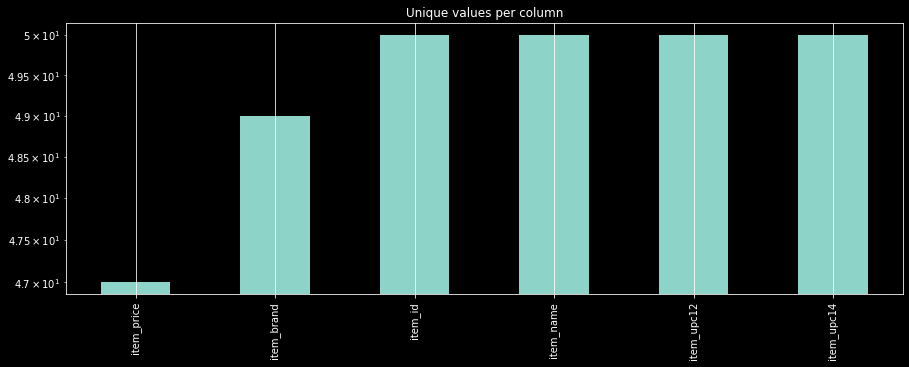

In [ ]:
items=get_items_data()


In [ ]:
sales = sales.rename(columns={'item': 'item_id', 'store': 'store_id'})
# sanity check for my rename:
sales.columns
sales.shape
type(sales)
type(items)
# use more consistent names than i did probably -_-
df = pd.merge(sales, items, how='left', on='item_id')


|    | name        | data type   |   unique |   total count |   null count |   non null kurt |   percent null |
|---:|:------------|:------------|---------:|--------------:|-------------:|----------------:|---------------:|
|  0 | store_id    | int64       |       10 |        913000 |            0 |        -1.22424 |              0 |
|  1 | item_price  | float64     |       47 |        913000 |            0 |        -1.17242 |              0 |
|  2 | item_brand  | object      |       49 |        913000 |            0 |       nan       |              0 |
|  3 | item_id     | int64       |       50 |        913000 |            0 |        -1.20096 |              0 |
|  4 | item_name   | object      |       50 |        913000 |            0 |       nan       |              0 |
|  5 | item_upc12  | int64       |       50 |        913000 |            0 |        -0.64867 |              0 |
|  6 | item_upc14  | int64       |       50 |        913000 |            0 |        -0.64867 |          

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14
head_1,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
head_2,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
head_3,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
dtypes,int64,float64,object,int64,int64,object,object,float64,int64,int64
count,913000.0,913000.0,913000,913000.0,913000.0,913000,913000,913000.0,913000.0,913000.0
unique,NaN,NaN,1826,NaN,NaN,49,50,NaN,NaN,NaN
top,NaN,NaN,"Tue, 01 Jan 2013 00:00:00 GMT",NaN,NaN,Usda Produce,Riceland American Jazmine Rice,NaN,NaN,NaN
freq,NaN,NaN,500,NaN,NaN,36520,18260,NaN,NaN,NaN
mean,25.5,52.250287,NaN,456500.5,5.5,NaN,NaN,5.1604,238468784491.329346,238468784491.329346
std,14.430878,28.801144,NaN,263560.542224,2.872283,NaN,NaN,2.737764,297800470359.086914,297800470359.086914


(913000, 10)

<AxesSubplot:title={'center':'Unique values per column'}>

,name,data type,unique,total count,null count,non null kurt,percent null
0,store_id,int64,10,913000,0,-1.224243,0.0
1,item_price,float64,47,913000,0,-1.172425,0.0
2,item_brand,object,49,913000,0,NaN,0.0
3,item_id,int64,50,913000,0,-1.200960,0.0
4,item_name,object,50,913000,0,NaN,0.0
5,item_upc12,int64,50,913000,0,-0.648670,0.0
6,item_upc14,int64,50,913000,0,-0.648670,0.0
7,sale_amount,float64,213,913000,0,0.509070,0.0
8,sale_date,object,1826,913000,0,NaN,0.0
9,sale_id,int64,913000,913000,0,-1.200000,0.0


,name,data type,unique,total count,null count,non null kurt,percent null
0,store_id,int64,10,913000,0,-1.224243,0.0
1,item_price,float64,47,913000,0,-1.172425,0.0
2,item_brand,object,49,913000,0,NaN,0.0
3,item_id,int64,50,913000,0,-1.200960,0.0
4,item_name,object,50,913000,0,NaN,0.0
5,item_upc12,int64,50,913000,0,-0.648670,0.0
6,item_upc14,int64,50,913000,0,-0.648670,0.0
7,sale_amount,float64,213,913000,0,0.509070,0.0
8,sale_date,object,1826,913000,0,NaN,0.0
9,sale_id,int64,913000,913000,0,-1.200000,0.0


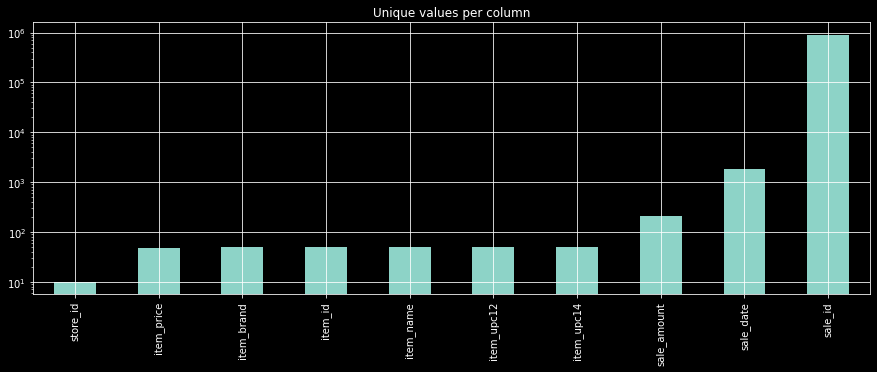

In [ ]:
pd_DF_one_shot_info(df,log_bool=True)




In [7]:
store_url = 'https://python.zgulde.net/api/v1/stores'
# put the contents of store_response into a variable
store_response = requests.get(store_url).json()
# inside of store_response i have a payload and a status
# inside of the payload, I have store content as well as 
# information about the pagination of the information
# I only have one page here, so let's store it as a
# dataframe
store_response['payload']['stores'][0:3]
store_df = store_response['payload']['stores']
store_url
# if i wanted to grab a new endpoint from the initial payload I 
# could reference it as thus:
requests.get(
    'https://python.zgulde.net/api/v1').json(
)['payload']['routes'][2]

'/items'

In [8]:

type(store_df)
store_df=pd.DataFrame(store_df)


df = pd.merge(df, store_df, how='left', on='store_id')

|    | name          | data type   |   unique |   total count |   null count |   non null kurt |   percent null |
|---:|:--------------|:------------|---------:|--------------:|-------------:|----------------:|---------------:|
|  0 | store_city    | object      |        1 |        913000 |            0 |      nan        |              0 |
|  1 | store_state   | object      |        1 |        913000 |            0 |      nan        |              0 |
|  2 | store_address | object      |       10 |        913000 |            0 |      nan        |              0 |
|  3 | store_id      | int64       |       10 |        913000 |            0 |       -1.22424  |              0 |
|  4 | store_zipcode | object      |       10 |        913000 |            0 |       -0.800003 |              0 |
|  5 | item_price    | float64     |       47 |        913000 |            0 |       -1.17242  |              0 |
|  6 | item_brand    | object      |       49 |        913000 |            0 |      nan 

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
head_1,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
head_2,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
head_3,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
dtypes,int64,float64,object,int64,int64,object,object,float64,int64,int64,object,object,object,object
count,913000.0,913000.0,913000,913000.0,913000.0,913000,913000,913000.0,913000.0,913000.0,913000,913000,913000,913000
unique,NaN,NaN,1826,NaN,NaN,49,50,NaN,NaN,NaN,10,1,1,10
top,NaN,NaN,"Tue, 01 Jan 2013 00:00:00 GMT",NaN,NaN,Usda Produce,Riceland American Jazmine Rice,NaN,NaN,NaN,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
freq,NaN,NaN,500,NaN,NaN,36520,18260,NaN,NaN,NaN,91300,913000,913000,91300
mean,25.5,52.250287,NaN,456500.5,5.5,NaN,NaN,5.1604,238468784491.329346,238468784491.329346,NaN,NaN,NaN,NaN
std,14.430878,28.801144,NaN,263560.542224,2.872283,NaN,NaN,2.737764,297800470359.086914,297800470359.086914,NaN,NaN,NaN,NaN


(913000, 14)

<AxesSubplot:title={'center':'Unique values per column'}>

,name,data type,unique,total count,null count,non null kurt,percent null
0,store_city,object,1,913000,0,NaN,0.0
1,store_state,object,1,913000,0,NaN,0.0
2,store_address,object,10,913000,0,NaN,0.0
3,store_id,int64,10,913000,0,-1.224243,0.0
4,store_zipcode,object,10,913000,0,-0.800003,0.0
5,item_price,float64,47,913000,0,-1.172425,0.0
6,item_brand,object,49,913000,0,NaN,0.0
7,item_id,int64,50,913000,0,-1.200960,0.0
8,item_name,object,50,913000,0,NaN,0.0
9,item_upc12,int64,50,913000,0,-0.648670,0.0


,name,data type,unique,total count,null count,non null kurt,percent null
0,store_city,object,1,913000,0,NaN,0.0
1,store_state,object,1,913000,0,NaN,0.0
2,store_address,object,10,913000,0,NaN,0.0
3,store_id,int64,10,913000,0,-1.224243,0.0
4,store_zipcode,object,10,913000,0,-0.800003,0.0
5,item_price,float64,47,913000,0,-1.172425,0.0
6,item_brand,object,49,913000,0,NaN,0.0
7,item_id,int64,50,913000,0,-1.200960,0.0
8,item_name,object,50,913000,0,NaN,0.0
9,item_upc12,int64,50,913000,0,-0.648670,0.0


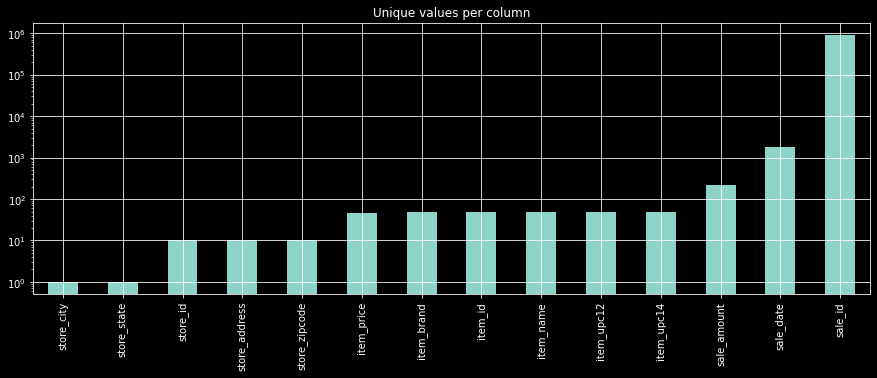

In [9]:


pd_DF_one_shot_info(df,log_bool=True)





In [10]:
df['sale_date']=df['sale_date'].str.strip().str.replace('GMT','').str.replace('00:00:00','').str.strip()




In [16]:

df['sale_date']=pd.to_datetime(df['sale_date'],format='%a, %d %b %Y')

dfdatetime=df['sale_date']
# datmax=df['sale_date'].max()
# datmin=df['sale_date'].min()




# def datetimecolsforDF(df,datetimecol):
# dfdatetime=df[datetimecol]
datmax=dfdatetime.max()
datmin=dfdatetime.min()

intervalsformonthbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='b', name=None, closed='right')
intervalsforyearbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='Y', name=None, closed='right')
intervalsforweekbins=pd.interval_range(start=datmin, end=datmax, periods=None, freq='7d', name=None, closed='right')


day=dfdatetime.dt.day_of_week
week=dfdatetime.dt.week
month=dfdatetime.dt.month
year=dfdatetime.dt.year
quarter=dfdatetime.dt.quarter

df['day']=day
df['week']=week
df['month']=month
df['year']=year
df['quarter']=quarter



weeksbin=dfdatetime.dt.to_period(freq='W')
monthsbin=dfdatetime.dt.to_period(freq='b')
quarterbin=dfdatetime.dt.to_period(freq='b')



In [17]:
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,day,week,month,year,quarter
0,1,13.0,2013-01-01,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,1,1,2013,1
1,1,11.0,2013-01-02,2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,2,1,1,2013,1
2,1,14.0,2013-01-03,3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,3,1,1,2013,1
3,1,13.0,2013-01-04,4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,4,1,1,2013,1
4,1,10.0,2013-01-05,5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,5,1,1,2013,1
